In [283]:
!pip install -q datasets jiwer
!pip install fugashi[unidic-lite]
!pip install ipadic

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [284]:
import os
import pandas as pd
import json
unicode_to_class={}
class_to_unicode={}
unicodes=["3042", "3044", "3046", "3048", "304a", "304b", "304c", "304d", "304e", "304f", "3050", "3051", "3052", "3053", "3054", "3055", "3056", "3057", "3058", "3059", "305a", "305b", "305c", "305d", "305e", "305f", "3060", "3061", "3062", "3064", "3065", "3066", "3067", "3068", "3069", "306a", "306b", "306c", "306d", "306e", "306f", "3070", "3071", "3072", "3073", "3074", "3075", "3076", "3077", "3078", "3079", "307a", "307b", "307c", "307d", "307e", "307f", "3080", "3081", "3082", "3084", "3086", "3088", "3089", "308a", "308b", "308c", "308d", "308f", "3092", "3093"]
count=0
for u in unicodes:
    hex="0x"+u
    unicode_to_class[hex]=count
    class_to_unicode[count]=hex
    count+=1
print(class_to_unicode)

def class2hiragana(class_sequence):
    return "".join(list(map(lambda pred: chr(int(class_to_unicode[int(pred)], 16)), class_sequence)))
def json_to_df_labels(file):
    with open(file) as user_file:
      file_contents = user_file.read()
    sentence_unicode_labels = json.loads(file_contents)
    sentence_class_labels = dict(map(lambda x: (x + '.jpg', list(map(lambda unicode: unicode_to_class[unicode],sentence_unicode_labels[x]))), sentence_unicode_labels))
    return pd.DataFrame([{'img':img, 'label':list(map(lambda unicode: int(unicode), label))} for img, label in sentence_class_labels.items()])

df = json_to_df_labels('sentence_labels.json')
df['text']=df['label'].apply(lambda x: class2hiragana(x))
display(df.head())

{0: '0x3042', 1: '0x3044', 2: '0x3046', 3: '0x3048', 4: '0x304a', 5: '0x304b', 6: '0x304c', 7: '0x304d', 8: '0x304e', 9: '0x304f', 10: '0x3050', 11: '0x3051', 12: '0x3052', 13: '0x3053', 14: '0x3054', 15: '0x3055', 16: '0x3056', 17: '0x3057', 18: '0x3058', 19: '0x3059', 20: '0x305a', 21: '0x305b', 22: '0x305c', 23: '0x305d', 24: '0x305e', 25: '0x305f', 26: '0x3060', 27: '0x3061', 28: '0x3062', 29: '0x3064', 30: '0x3065', 31: '0x3066', 32: '0x3067', 33: '0x3068', 34: '0x3069', 35: '0x306a', 36: '0x306b', 37: '0x306c', 38: '0x306d', 39: '0x306e', 40: '0x306f', 41: '0x3070', 42: '0x3071', 43: '0x3072', 44: '0x3073', 45: '0x3074', 46: '0x3075', 47: '0x3076', 48: '0x3077', 49: '0x3078', 50: '0x3079', 51: '0x307a', 52: '0x307b', 53: '0x307c', 54: '0x307d', 55: '0x307e', 56: '0x307f', 57: '0x3080', 58: '0x3081', 59: '0x3082', 60: '0x3084', 61: '0x3086', 62: '0x3088', 63: '0x3089', 64: '0x308a', 65: '0x308b', 66: '0x308c', 67: '0x308d', 68: '0x308f', 69: '0x3092', 70: '0x3093'}


,img,label,text
0,0.jpg,"[53, 62, 2, 19, 25, 66, 40, 16, 46, 53]",ぼようすたれはざふぼ
1,1.jpg,"[6, 49, 22, 66, 51, 20, 22, 16, 59, 47]",がへぜれぺずぜざもぶ
2,2.jpg,"[44, 30, 24, 31, 15, 14, 9, 69, 25, 41]",びづぞてさごくをたば
3,3.jpg,"[16, 38, 22, 18, 62, 29, 53, 45, 3, 35]",ざねぜじよつぼぴえな
4,4.jpg,"[10, 59, 45, 35, 3, 4, 24, 0, 45, 15]",ぐもぴなえおぞあぴさ


In [285]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df, test_size=0.2)
# we reset the indices to start from zero
train_df.reset_index(drop=True, inplace=True)
test_df.reset_index(drop=True, inplace=True)

In [286]:
# from PIL import Image
# from transformers import TrOCRProcessor
# processor = TrOCRProcessor.from_pretrained("microsoft/trocr-base-handwritten")
# image = Image.open("Sentences/0.jpg").convert("RGB")
# processor(image, return_tensors="pt").pixel_values

In [287]:
# from transformers import AutoTokenizer
# tokenizer = AutoTokenizer.from_pretrained("cl-tohoku/bert-base-japanese-char" )
# b = df['label'][10]
# print("LABEL:\n",b)
# line = class2hiragana(b)
# print("HIRAGANA:\n",line,'\n')
# inputs = tokenizer(class2hiragana(b), return_tensors="pt")
# print('TOKENIZED:\n',inputs)
# print("DECODED:\n",tokenizer.decode(inputs["input_ids"][0]))
# inputs['input_ids'].shape

In [288]:
# idx = 14
# b = df['label'][idx]
# print(class2hiragana(b))
# labels = processor.tokenizer(class2hiragana(b), padding="max_length", max_length=128).input_ids
# print(labels)
# print(processor.decode(labels, skip_special_tokens=True))
# print(len(labels))

In [289]:
# b = df['label'][8]
# prompt = class2hiragana(b)

# input_ids = tokenizer(prompt, return_tensors="pt").input_ids
# print(input_ids)
# # gen_tokens = model.generate(
# #     input_ids,
# #     do_sample=True,
# #     temperature=0.9,
# #     max_length=100,
# # )
# gen_text = tokenizer.batch_decode(input_ids, skip_special_tokens=True)[0]

# print(prompt)
# print(gen_text)

In [290]:
tokenizer = GPTNeoXJapaneseTokenizer.from_pretrained("abeja/gpt-neox-japanese-2.7b")
print(class2hiragana(b))
inputs = tokenizer(class2hiragana(b), return_tensors="pt", padding='max_length', max_length=128).input_ids
print(tokenizer.batch_decode(inputs, skip_special_tokens=True)[0])

まひぞすざつつぐへう
まひぞすざつつぐへう


In [291]:
import torch
from torch.utils.data import Dataset
from PIL import Image
from torchvision.io import read_image
from torchvision.transforms import Resize

class CustomImageDataset(Dataset):
    def __init__(self, img_dir, df, processor, tokenizer, max_target_length=128):
        self.img_dir = img_dir
        self.df = df
        self.processor = processor
        self.tokenizer = tokenizer
        self.max_target_length = max_target_length

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        # get file name + text 
        file_name = self.df['img'][idx]
        text = self.df['text'][idx]
        # prepare image (i.e. resize + normalize)
        image = Image.open(os.path.join(self.img_dir, file_name)).convert("RGB")
        pixel_values = self.processor(image, return_tensors="pt").pixel_values
        # add labels (input_ids) by encoding the text
        labels = self.tokenizer(text,
                                          padding="max_length", 
                                          max_length=self.max_target_length).input_ids
        # important: make sure that PAD tokens are ignored by the loss function
        labels = [label if label != self.tokenizer.pad_token_id else -100 for label in labels]

        encoding = {"pixel_values": pixel_values.squeeze(), "labels": torch.tensor(labels)}
                
        return encoding



In [292]:
from transformers import TrOCRProcessor, VisionEncoderDecoderModel, GPTNeoXJapaneseTokenizer
import requests

processor = TrOCRProcessor.from_pretrained("microsoft/trocr-base-handwritten")
tokenizer = GPTNeoXJapaneseTokenizer.from_pretrained("abeja/gpt-neox-japanese-2.7b")
train_dataset = CustomImageDataset(img_dir='Sentences/',
                                   df = train_df,
                                   processor=processor,
                                   tokenizer=tokenizer)
eval_dataset = CustomImageDataset(img_dir='Sentences/',
                                   df = test_df,
                                   processor=processor,
                                   tokenizer=tokenizer)

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration. Please open a PR/issue to update `preprocessor_config.json` to use `image_processor_type` instead of `feature_extractor_type`. This warning will be removed in v4.40.


In [293]:
print("Number of training examples:", len(train_dataset))
print("Number of validation examples:", len(eval_dataset))

Number of training examples: 800
Number of validation examples: 200


In [294]:
encoding = train_dataset[2]
for k,v in encoding.items():
  print(k, v.shape)

pixel_values torch.Size([3, 384, 384])
labels torch.Size([128])


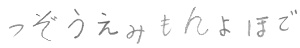

In [295]:
image = Image.open(train_dataset.img_dir + train_df['img'][2]).convert("RGB")
image

In [296]:
labels = encoding['labels']
labels[labels == -100] = tokenizer.pad_token_id
label_str = tokenizer.decode(labels, skip_special_tokens=True)
print(label_str)

つぞうえみもんよほで


In [297]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(train_dataset, batch_size=4, shuffle=True)
eval_dataloader = DataLoader(eval_dataset, batch_size=4)

In [298]:
from transformers import VisionEncoderDecoderModel
import torch
import requests

# initialize the encoder from a pretrained ViT and the decoder from a pretrained BERT model. 
# Note that the cross-attention layers will be randomly initialized, and need to be fine-tuned on a downstream dataset
model = VisionEncoderDecoderModel.from_encoder_decoder_pretrained(
    "google/vit-base-patch16-384", "cl-tohoku/bert-base-japanese"
)
model

Some weights of ViTModel were not initialized from the model checkpoint at google/vit-base-patch16-384 and are newly initialized: ['vit.pooler.dense.bias', 'vit.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of BertLMHeadModel were not initialized from the model checkpoint at cl-tohoku/bert-base-japanese and are newly initialized: ['bert.encoder.layer.0.crossattention.output.LayerNorm.bias', 'bert.encoder.layer.0.crossattention.output.LayerNorm.weight', 'bert.encoder.layer.0.crossattention.output.dense.bias', 'bert.encoder.layer.0.crossattention.output.dense.weight', 'bert.encoder.layer.0.crossattention.self.key.bias', 'bert.encoder.layer.0.crossattention.self.key.weight', 'bert.encoder.layer.0.crossattention.self.query.bias', 'bert.encoder.layer.0.crossattention.self.query.weight', 'bert.encoder.layer.0.crossattention.self.value.bias', 'bert.encoder.layer.0.crossattention.self.value.weig

VisionEncoderDecoderModel(
  (encoder): ViTModel(
    (embeddings): ViTEmbeddings(
      (patch_embeddings): ViTPatchEmbeddings(
        (projection): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
      )
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): ViTEncoder(
      (layer): ModuleList(
        (0-11): 12 x ViTLayer(
          (attention): ViTAttention(
            (attention): ViTSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
            (output): ViTSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
          )
          (intermediate): ViTIntermediate(
            (dense): Linear(in_featur

In [299]:
# set special tokens used for creating the decoder_input_ids from the labels
model.config.decoder_start_token_id = processor.tokenizer.cls_token_id
model.config.pad_token_id = tokenizer.pad_token_id
# make sure vocab size is set correctly
model.config.vocab_size = model.config.decoder.vocab_size

# set beam search parameters
model.config.eos_token_id = tokenizer.sep_token_id
model.config.max_length = 128
model.config.early_stopping = True
model.config.no_repeat_ngram_size = 3
model.config.length_penalty = 2.0
model.config.num_beams = 4

In [300]:
# tokenizer = AutoTokenizer.from_pretrained("cl-tohoku/bert-base-japanese-char")
tokenizer.vocab_size

32000

In [301]:
model.config.decoder.vocab_size

32000

In [302]:
from datasets import load_metric

cer_metric = load_metric("cer")

In [309]:
from transformers import AdamW
from tqdm.notebook import tqdm
!pip install ipywidgets
!pip install ipywidgets

optimizer = AdamW(model.parameters(), lr=5e-5)

for epoch in range(10):  # loop over the dataset multiple times
   # train
    model.train()
    train_loss = 0.0
    for batch in tqdm(train_dataloader, total=len(train_dataloader)):
        print("next batch...")
        # get the inputs
        for k,v in batch.items():
            batch[k] = v
        # forward + backward + optimize
        outputs = model(**batch)
        loss = outputs.loss
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        train_loss += loss.item()
        
    print(f"Loss after epoch {epoch}:", train_loss/len(train_dataloader))
    
    # evaluate
    model.eval()
    valid_cer = 0.0
    with torch.no_grad():
        for batch in tqdm(eval_dataloader):
            # run batch generation
            outputs = model.generate(batch["pixel_values"])
            # compute metrics
            cer = compute_cer(pred_ids=outputs, label_ids=batch["labels"])
            valid_cer += cer 

    print("Validation CER:", valid_cer / len(eval_dataloader))

model.save_pretrained(".")

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


  0%|          | 0/200 [00:00<?, ?it/s]

next batch...
next batch...
next batch...
next batch...
next batch...
next batch...
next batch...
next batch...
next batch...
next batch...
next batch...
next batch...
next batch...
next batch...
next batch...
next batch...
next batch...
next batch...
next batch...
next batch...
next batch...
next batch...
next batch...
next batch...
next batch...
next batch...
next batch...
next batch...
next batch...
next batch...
next batch...
next batch...
next batch...
next batch...
next batch...
next batch...
next batch...
next batch...
next batch...
next batch...
next batch...
next batch...
next batch...
next batch...
next batch...
next batch...
next batch...
next batch...
next batch...
next batch...
next batch...
next batch...
next batch...


KeyboardInterrupt: 

In [313]:
torch.save({
                                'model_state_dict': model.state_dict(),
                                'optimizer_state_dict': optimizer.state_dict(),
                                }, 'trocr.pt')

In [315]:
checkpoint = torch.load('trocr.pt')
model.load_state_dict(checkpoint['model_state_dict'])
optimizer.load_state_dict(checkpoint['optimizer_state_dict'])

In [339]:
a = next(iter(eval_dataloader))

In [348]:
a_outputs = model.generate(a['pixel_values'][:1])

In [342]:
a_labels = a['labels'][:1]

In [346]:
labels = a_labels
labels[labels == -100] = tokenizer.pad_token_id
label_str = tokenizer.decode(labels.squeeze(), skip_special_tokens=True)
print(label_str)

せねむずるこぺごびな


In [350]:
preds = a_outputs
preds[preds == -100] = tokenizer.pad_token_id
preds_str = tokenizer.decode(preds.squeeze(), skip_special_tokens=True)
print(preds_str)

してずずずぞずぞぞぞずぐずずぐぞずずぱずぞぐぞぞぐずぐぐずぞぱずずぷぞずぱぞぞぱぞずぷずぞぷずずじぞずじずぞじぞぞぷぞぞじずぐぱぞぐぐぐぞぱぐずぱぐぞぐぷずぐぷぞぐぱずぐじぞぐじずずべずぞべぞずべぞぞべずずねずぞねずずんずぞんずずよずぞよぞずねぞぞねぞずんぞ
